#### This notebook measures the error of an .swc output and a marker file with manually labeled corners.

In [85]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
ls

MeasureError.ipynb           untitled.txt
WatershedSegmentation.ipynb


In [15]:
ls ../cornea\ project/DATA_example_Holco_praire_Scan29/marker\ files/

Holco_Scan29_Landmark.marker* Tilting_guide.marker*
Landmarks_SKELETON.marker*


In [2]:
import pandas as pd

In [48]:
GTMarkerFile = "~/projects/cornea project/DATA_example_Holco_praire_Scan29/marker files/Holco_Scan29_Landmark.marker"

In [49]:
import os
#GTMarkerFile = os.path.join(os.getcwd()+".."+"cornea project"+"DATA_example_Holco_praire_Scan29"+"marker files"+"Holco_Scan29_Landmark.csv")

In [51]:
SWCFile = "~/projects/cornea project/DATA_example_Holco_praire_Scan29/processed/C3-Holco_Scan29_scaled_0.3.tif_SIGEN.swc"

In [61]:
### read .swc file
SWCMarkers = pd.read_csv(SWCFile, skiprows = 3,sep = " ",header = None)
SWCMarkers.columns = ["n","type","x","y","z","radius","parent"]
SWCMarkers.head()

,n,type,x,y,z,radius,parent
0,1,6,99.000,194.000,67.000,0.000,-1
1,2,3,98.000,195.000,68.000,0.000,1
2,3,3,97.333,196.333,68.000,0.745,2
3,4,3,98.000,197.333,67.667,0.745,3
4,5,3,99.000,199.200,67.600,1.265,4


In [89]:
# get roots
roots = SWCMarkers[SWCMarkers.parent==-1]
roots.shape

(569, 7)

In [93]:
# remove roots with big radius
small_roots = roots[roots.radius<2]
small_roots.shape
# seems none of the roots has a big radius???

(569, 7)

TypeError: float() argument must be a string or a number, not 'AxesSubplot'

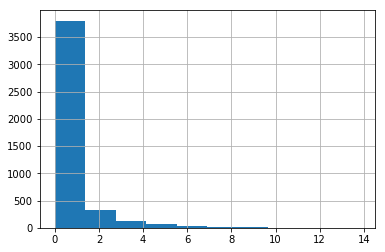

In [92]:
plt.plot(SWCMarkers.radius.hist())

In [111]:
### read .marker file with corners
GTMarkers = pd.read_csv(GTMarkerFile)
GTMarkers = GTMarkers.rename(columns = {'##x':'x'})

In [ ]:
## for each create ROI based on marker file


In [117]:
from sklearn.metrics.pairwise import pairwise_distances as pdist

In [112]:
GTMarkers[['x',"y","z"]]
roots[["x","y","z"]]

,x,y,z
0,99.0,194.0,67.0
1440,278.0,186.0,60.0
2163,277.0,265.0,76.0
2323,203.0,45.0,132.0
2360,209.0,226.0,55.0
2388,245.0,233.0,47.0
2399,206.0,128.0,153.0
2410,224.0,45.0,140.0
2437,215.0,137.0,151.0
2453,254.0,158.0,93.0


In [119]:
## for the branching points in .swc create a distance matrix
#from scipy.spatial.distance import pdist
res = pdist(GTMarkers[["x","y","z"]],roots[["x","y","z"]])

In [124]:
## find closest point
res.min(axis = 1)

(72,)

In [126]:
## calculate error
error = sum(res.min(axis = 1))

In [127]:
error

36763.028128742844

In [128]:
# Need to come up with a way to deal with missing points?

In [ ]:
# create a file

